In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime as dt

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [4]:
from graf_iono_absorp import total_input_power, MLT, input_power_scaling
import xflib
xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')

flats = [50, 40, 30, 20, 10, 0]
flons = [0, 90, 180]

lat_spread = 20
lon_spread = 20
cellsize = 0.5
flash_lats, flash_lons = np.meshgrid(flats, flons)

all_data = []
for flash_lat, flash_lon in zip(flash_lats.ravel(), flash_lons.ravel()):
    print flash_lat, flash_lon
    flash_pos_mag = [1, flash_lat, flash_lon]
    itime = dt.datetime(2010,1,1,0,0,0)
    print "MLT: ", MLT(itime, flash_lon, xf)
    flash_pos_sm = xf.rllmag2sm(flash_pos_mag, itime)

    # print flash_pos_sm

    Hz2Rad = 2.*np.pi

    D2R = np.pi/180.
    H_IONO = 1e5
    R_E = 6371e3

    wmin = 200*Hz2Rad
    wmax = 230*Hz2Rad
    lats = np.arange(flash_lat - lat_spread, flash_lat + lat_spread, cellsize)
    lons = np.arange(flash_lon - lon_spread, flash_lon + lon_spread, cellsize)
    I0 = -10000

    f1 = 200; f2 = 30000;
    num_freqs = 33
    flogs = np.linspace(np.log10(f1), np.log10(f2), num_freqs)
    freqs = np.round(pow(10, flogs)/10.)*10



    data = np.zeros([len(lats)-1, len(lons)-1])
    for latind, (latmin, latmax) in enumerate(zip(lats[0:-1], lats[1:])):
        for lonind, (lonmin, lonmax) in enumerate(zip(lons[0:-1], lons[1:])):
            for (fmin, fmax) in zip(freqs[0:-1], freqs[1:]):

                lat = (latmax + latmin)/2.
                lon = (lonmax + lonmin)/2.

                w = (fmin + fmax)*Hz2Rad/2.;
                dw = (fmax - fmin)*Hz2Rad
                mlt = MLT(itime, lon, xf);
                tmp_coords = [1 + H_IONO/R_E, lat, lon];
                x_sm = xf.rllmag2sm(tmp_coords, itime);

                pwr = input_power_scaling(flash_pos_sm, x_sm, lat, w, I0, mlt, xf);

                dist_lat = (R_E + H_IONO)*(latmax - latmin)*D2R;
                dist_lon = (R_E + H_IONO)*(lonmax - lonmin)*np.sin(D2R*lat)*D2R;
                                # // Latitude distance      longitude distance       freq dist
                # // cout << "dist_lat: " << dist_lat << ", dist_lon: " << dist_lon << "\n";
                data[latind, lonind] += pwr*dw # * dist_lat * dist_lon * (wmax - wmin);
        #         data[lonind, latind] = total_input_power(flash_pos_sm, I0, latmin, latmax, lonmin, lonmax, wmin, wmax, itime)

    all_data.append(data)
#     fig, ax = plt.subplots(1,1)
#     ax.pcolorfast(lats, lons, data)
#     ax.set_aspect('equal')

50 0
MLT:  0.0
40 0
MLT:  0.0
30 0
MLT:  0.0
20 0
MLT:  0.0
10 0
MLT:  0.0
0 0
MLT:  0.0
50 90
MLT:  6.0
40 90
MLT:  6.0
30 90
MLT:  6.0
20 90
MLT:  6.0
10 90
MLT:  6.0
0 90
MLT:  6.0
50 180
MLT:  12.0
40 180
MLT:  12.0
30 180
MLT:  12.0
20 180
MLT:  12.0
10 180
MLT:  12.0
0 180
MLT:  12.0


<IPython.core.display.Javascript object>


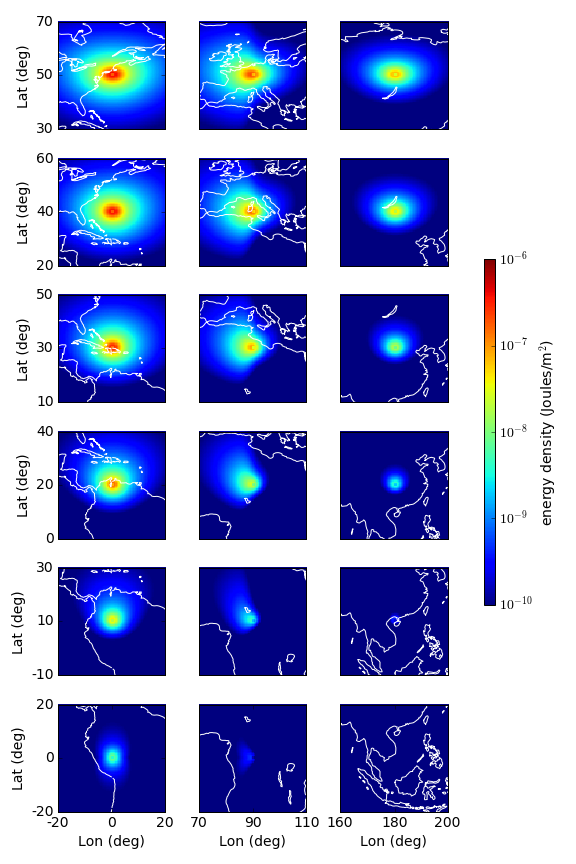

In [12]:
# for plotting
# from mpl_toolkits.basemap import Basemap
# m = Basemap(ax1,resolution='c',projection='robin', lon_0 = 0)
import scipy.io
import xflib
# xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')

# coastlines = scipy.io.loadmat('coastlines.mat')

# coast_lat_mag = np.zeros_like(coastlines['lat'])
# coast_lon_mag = np.zeros_like(coastlines['long'])

# for ind, (lat, lon) in enumerate(zip(coastlines['lat'], coastlines['long'])):
    
#     tmpcoords = [1, lat[0], lon[0]]
#     tmp_mag = xf.rllgeo2rllmag(tmpcoords, itime)
#     coast_lat_mag[ind] = tmp_mag[1]
#     coast_lon_mag[ind] = tmp_mag[2]
    

# coast_lon_mag[coast_lon_mag > 180] -= 360
for ind, (lat, lon) in enumerate(zip(coastlines['lat'], coastlines['long'])):
    tmpcoords = [1, lat, lon]
    tmp_mag = xf.geo2mag(tmpcoords, itime)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
clims = [-10, -6]

# lat_spread = 20
# lon_spread = 20
# clims = [1e-13, 5e-7]
# --------------- Latex Plot Beautification --------------------------
fig_width = 7 
fig_height = 11
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
fig, ax = plt.subplots(len(flats),len(flons))
ax = ax.T.flatten()
for d in range(len(all_data)):
    flash_lat = flash_lats.ravel()[d]
    flash_lon = flash_lons.ravel()[d]
    
    lats = np.arange(flash_lat - lat_spread, flash_lat + lat_spread, cellsize)
    lons = np.arange(flash_lon - lon_spread, flash_lon + lon_spread, cellsize)
    
    p = ax[d].pcolorfast(lons, lats, np.log10(all_data[d]), vmin=clims[0], vmax=clims[1])

    
    ax[d].plot(coast_lon_mag, coast_lat_mag, 'w')


    ax[d].set_aspect('equal')
    ax[d].set_ylabel('Lat (deg)')
    ax[d].set_xlabel('Lon (deg)')
    ax[d].set_xlim([flash_lon - lon_spread, flash_lon + lon_spread-1])
    ax[d].set_ylim([flash_lat - lat_spread, flash_lat + lat_spread-1])
    

    yticks = [lats[0], lats[len(lats)/2], lats[-1]]
    ax[d].set_yticks(yticks)
    ax[d].set_yticklabels(['%d'%x for x in [flash_lat - lat_spread, flash_lat, flash_lat + lat_spread]])

    xticks = [lons[0], lons[len(lons)/2], lons[-1]]
    ax[d].set_xticks(xticks)
    ax[d].set_xticklabels(['%d'%x for x in [flash_lon - lon_spread, flash_lon, flash_lon + lon_spread]])
    



    
ax = ax.reshape(len(flons), len(flats)).T

for a in ax[0:-1,:].flatten():
    a.set_xticks([])
    a.set_xlabel('')
for a in ax[:,1:].flatten():
    a.set_yticks([])
    a.set_ylabel('')
fig.tight_layout()



# cax = fig.colorbar(p, ax=ax.ravel().tolist())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.84,0.3, 0.02, 0.4])

# divider = make_axes_locatable(ax.tolist())
# cax = divider.append_axes("right",size="4%",pad=0.15)
cb = plt.colorbar(p, cax=cbar_ax)
cb.set_label('energy density (Joules/m$^2$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)

fig.savefig('input_energy.png',ldpi=300)

In [13]:
# Integrate energy densities to get total energy per flash:


for ind, d in enumerate(all_data):
    
    flash_lat = flash_lats.ravel()[ind]
    flash_lon = flash_lons.ravel()[ind]
    lats = np.arange(flash_lat - lat_spread, flash_lat + lat_spread - cellsize, cellsize)

    # Area is latitude-dependent
    dist_lat = (R_E + H_IONO)*cellsize*D2R
    
    dist_lon = (R_E + H_IONO)*cellsize*D2R*np.cos(D2R*lats)
    areas = dist_lat*dist_lon

    print "lat:\t%d\tlon:\t%d\t%2.2f\tkj"%(flash_lat, flash_lon, np.sum(d*areas[:,np.newaxis])*1e-3)
    


lat:	50	lon:	0	81.08	kj
lat:	40	lon:	0	76.24	kj
lat:	30	lon:	0	60.90	kj
lat:	20	lon:	0	31.86	kj
lat:	10	lon:	0	9.14	kj
lat:	0	lon:	0	2.64	kj
lat:	50	lon:	90	38.11	kj
lat:	40	lon:	90	30.10	kj
lat:	30	lon:	90	18.39	kj
lat:	20	lon:	90	7.35	kj
lat:	10	lon:	90	1.85	kj
lat:	0	lon:	90	0.54	kj
lat:	50	lon:	180	13.43	kj
lat:	40	lon:	180	8.46	kj
lat:	30	lon:	180	3.61	kj
lat:	20	lon:	180	0.92	kj
lat:	10	lon:	180	0.13	kj
lat:	0	lon:	180	0.02	kj


In [9]:
print "MLT: ", MLT(itime, 0, xf)

print np.shape(all_data)
print np.shape(ax)

print np.max(all_data)
print np.min(all_data)

MLT:  0.0
(18, 79, 79)
()
3.7929081003e-07
2.43535745916e-15


In [2]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 4 
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
fig, ax = plt.subplots(1,1)
lats = np.arange(flash_lat - lat_spread, flash_lat + lat_spread, cellsize)
lons = np.arange(flash_lon - lon_spread, flash_lon + lon_spread, cellsize)

#     p = ax[d].pcolorfast(lons, lats, np.log10(all_data[d].T), vmin=clims[0], vmax=clims[1])

m = Basemap(width=12000000,height=9000000,
            resolution='l',projection='eqdc',\
            lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.drawcoastlines(color='black')
m.drawmapboundary()
m.fillcontinents(color='grey',alpha=0.3)
x, y = m(lons, lats)

<IPython.core.display.Javascript object>

NameError: name 'flash_lat' is not defined

<IPython.core.display.Javascript object>


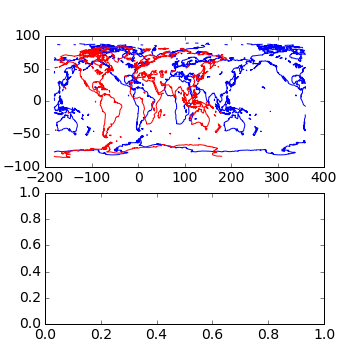

In [11]:
import scipy.io
import xflib

# Convert the Matlab coastline datafile to geomagnetic coordinates:

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/3dWIPP/python/libxformd.so')
coastlines = scipy.io.loadmat('coastlines.mat')

coast_lat_mag = np.zeros(len(coastlines['lat']))
coast_lon_mag = np.zeros(len(coastlines['long']))

for ind, (lat, lon) in enumerate(zip(coastlines['lat'], coastlines['long'])):
    if np.isnan(lat) or np.isnan(lon):
        coast_lat_mag[ind] = np.nan
        coast_lon_mag[ind] = np.nan
    else:
        tmpcoords = [1, lat[0], lon[0]]
        tmp_mag = xf.rllgeo2rllmag(tmpcoords, itime)
        coast_lat_mag[ind] = tmp_mag[1]
        coast_lon_mag[ind] = tmp_mag[2]

# Loop around for -180 + 180 ranges
coast_lat_mag = np.concatenate([coast_lat_mag, coast_lat_mag[coast_lon_mag > 180]])
coast_lon_mag = np.concatenate([coast_lon_mag, (coast_lon_mag[coast_lon_mag > 180] - 360)])

# Toss in some NaNs to break up the continents
for ind in range(len(coast_lat_mag) -1):
    if ((np.abs(coast_lat_mag[ind+1] - coast_lat_mag[ind]) > 5) or
       (np.abs(coast_lon_mag[ind+1] - coast_lon_mag[ind]) > 5)):
        coast_lat_mag[ind] = np.nan
        coast_lon_mag[ind] = np.nan

    
fig, ax = plt.subplots(2,1)
ax[0].plot(coast_lon_mag, coast_lat_mag, 'b')
ax[0].plot(coastlines['long'],coastlines['lat'],'r')